In [54]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency, chi2

In [55]:
control = pd.read_csv('proj1_data/control_group.csv')
control.head()

,Campaign Name;Date;Spend [USD];# of Impressions;Reach;# of Website Clicks;# of Searches;# of View Content;# of Add to Cart;# of Purchase
0,Control Campaign;1.08.2019;2280;82702;56930;70...
1,Control Campaign;2.08.2019;1757;121040;102513;...
2,Control Campaign;3.08.2019;2343;131711;110862;...
3,Control Campaign;4.08.2019;1940;72878;61235;30...
4,Control Campaign;5.08.2019;1835;;;;;;;


In [56]:
control_cols = control.columns[0].split(";")

In [57]:
control = pd.DataFrame(list(control[control.columns[0]].apply(lambda x: x.split(";"))), columns = control_cols)
control.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Control Campaign,1.08.2019,2280,82702,56930,7016,2290,2159,1819,618
1,Control Campaign,2.08.2019,1757,121040,102513,8110,2033,1841,1219,511
2,Control Campaign,3.08.2019,2343,131711,110862,6508,1737,1549,1134,372
3,Control Campaign,4.08.2019,1940,72878,61235,3065,1042,982,1183,340
4,Control Campaign,5.08.2019,1835,,,,,,,


In [58]:
test = pd.read_csv('proj1_data/test_group.csv')
test_cols = test.columns[0].split(";")
test = pd.DataFrame(list(test[test.columns[0]].apply(lambda x: x.split(";"))), columns = test_cols)
test.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Test Campaign,1.08.2019,3008,39550,35820,3038,1946,1069,894,255
1,Test Campaign,2.08.2019,2542,100719,91236,4657,2359,1548,879,677
2,Test Campaign,3.08.2019,2365,70263,45198,7885,2572,2367,1268,578
3,Test Campaign,4.08.2019,2710,78451,25937,4216,2216,1437,566,340
4,Test Campaign,5.08.2019,2297,114295,95138,5863,2106,858,956,768


In [59]:
control.describe()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
count,30,30,30,30,30,30,30,30,30,30
unique,1,30,30,30,30,30,30,27,30,29
top,Control Campaign,1.08.2019,2280,82702,56930,7016,2290,1149,1819,766
freq,30,1,1,1,1,1,1,2,1,2


In [60]:
test.describe()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
count,30,30,30,30,30,30,30,30,30,30
unique,1,30,30,30,30,30,29,30,30,28
top,Test Campaign,1.08.2019,3008,39550,35820,3038,1995,1069,894,340
freq,30,1,1,1,1,1,2,1,1,2


In [61]:
#type conversion
test['Date'] = pd.to_datetime(test['Date'], format='%d.%m.%Y')
test['Spend [USD]'] = test['Spend [USD]'].apply(lambda x: int(x) if x != '' else 0)
test['# of Impressions'] = test['# of Impressions'].apply(lambda x: int(x) if x != '' else 0)
test['Reach'] = test['Reach'].apply(lambda x: int(x) if x != '' else 0)
test['# of Website Clicks'] = test['# of Website Clicks'].apply(lambda x: int(x) if x != '' else 0)
test['# of Searches'] = test['# of Searches'].apply(lambda x: int(x) if x != '' else 0)
test['# of View Content'] = test['# of View Content'].apply(lambda x: int(x) if x != '' else 0)
test['# of Add to Cart'] = test['# of Add to Cart'].apply(lambda x: int(x) if x != '' else 0)
test['# of Purchase'] = test['# of Purchase'].apply(lambda x: int(x) if x != '' else 0)

control['Date'] = pd.to_datetime(control['Date'], format='%d.%m.%Y')
control['Spend [USD]'] = control['Spend [USD]'].apply(lambda x: int(x) if x != '' else 0)
control['# of Impressions'] = control['# of Impressions'].apply(lambda x: int(x) if x != '' else 0)
control['Reach'] = control['Reach'].apply(lambda x: int(x) if x != '' else 0)
control['# of Website Clicks'] = control['# of Website Clicks'].apply(lambda x: int(x) if x != '' else 0)
control['# of Searches'] = control['# of Searches'].apply(lambda x: int(x) if x != '' else 0)
control['# of View Content'] = control['# of View Content'].apply(lambda x: int(x) if x != '' else 0)
control['# of Add to Cart'] = control['# of Add to Cart'].apply(lambda x: int(x) if x != '' else 0)
control['# of Purchase'] = control['# of Purchase'].apply(lambda x: int(x) if x != '' else 0)

We could examine some metrics:
- conversion rates = #purchase/ #website clicks
- cost per click = Spend/ website clicks
- cost per purchase = spend/ purchase
- click through rates = clicks/ #impressions

2. EDA

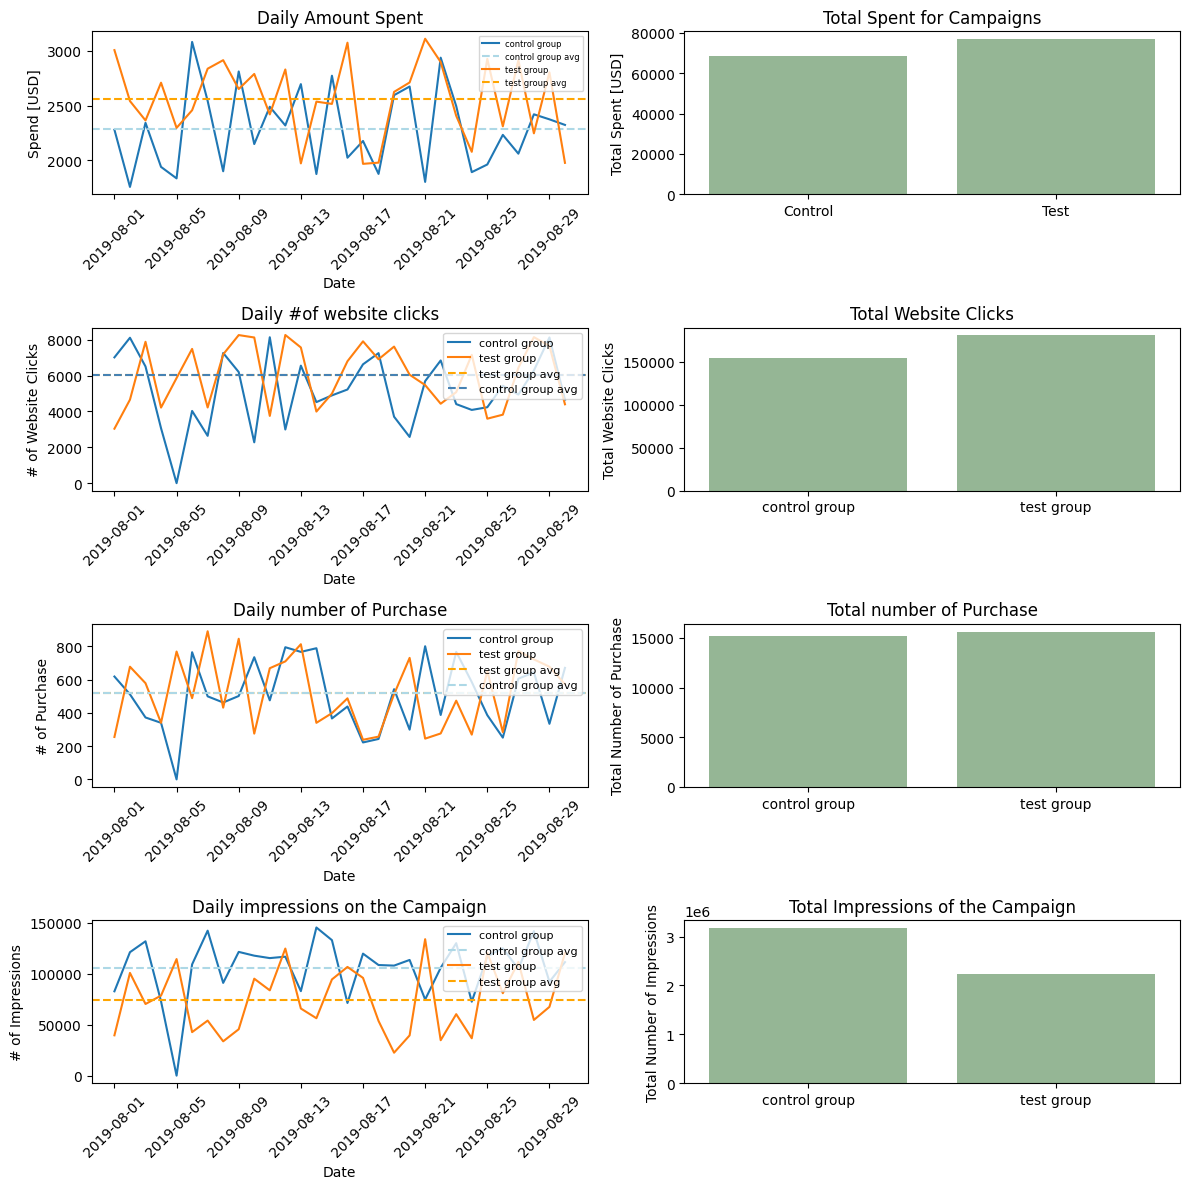

In [62]:
avg_spend_control = control['Spend [USD]'].mean()
avg_spend_test = test['Spend [USD]'].mean()

total_spend_control = control['Spend [USD]'].sum()
total_spend_test = test['Spend [USD]'].sum()

fig, axes = plt.subplots(ncols=2, nrows=4, figsize=(12, 12))
ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8 = axes.flatten()

ax1 = sns.lineplot(data=control, x='Date', y='Spend [USD]', label='control group', ax=ax1)
ax1.axhline(y=avg_spend_control, color='lightblue', ls='--', label='control group avg')
ax1 = sns.lineplot(data=test, x='Date', y='Spend [USD]', label='test group', ax=ax1)
ax1.axhline(y=avg_spend_test, ls='--', color='orange', label='test group avg')
ax1.set_title('Daily Amount Spent')
ax1.legend(fontsize=6, loc='upper right')
ax1.tick_params(axis='x', labelrotation=45)
ax1.set_xticks(ax1.get_xticks()) 
ax1.set_xticklabels(ax1.get_xticklabels())

ax2 = sns.barplot(x=['Control','Test'], y=[total_spend_control,total_spend_test], ax = ax2,color = '#8FBC8F')
ax2.set_ylabel('Total Spent [USD]')
ax2.set_title('Total Spent for Campaigns')

total_clicks_control = control['# of Website Clicks'].sum()
total_clicks_test = test['# of Website Clicks'].sum()
avg_clicks_test = test['# of Website Clicks'].mean()
avg_clicks_control = test['# of Website Clicks'].mean()

ax3 = sns.lineplot(data = control, x = 'Date', y = '# of Website Clicks', label = 'control group', ax = ax3)
ax3 = sns.lineplot(data = test, x = 'Date', y = '# of Website Clicks', label = 'test group', ax = ax3)
ax3.axhline(y = avg_clicks_test, color = 'orange', ls = '--', label = 'test group avg')
ax3.axhline(y = avg_clicks_control, color = 'steelblue', ls = '--', label = 'control group avg')
ax3.set_title('Daily #of website clicks')
ax3.legend(fontsize=8, loc='upper right')
ax3.tick_params(axis='x', labelrotation=45)
ax3.set_xticks(ax3.get_xticks()) 
ax3.set_xticklabels(ax1.get_xticklabels())

ax4 = sns.barplot(x = ['control group','test group'],y=[total_clicks_control, total_clicks_test], ax = ax4, color = '#8FBC8F')
ax4.set_ylabel('Total Website Clicks')
ax4.set_title('Total Website Clicks')

total_purchase_control = control['# of Purchase'].sum()
total_purchase_test = test['# of Purchase'].sum()
avg_purchase_test = test['# of Purchase'].mean()
avg_purchase_control = test['# of Purchase'].mean()

ax5 = sns.lineplot(data = control, x = 'Date', y = '# of Purchase', label = 'control group', ax = ax5)
ax5 = sns.lineplot(data = test, x = 'Date', y = '# of Purchase', label = 'test group', ax = ax5)
ax5.axhline(y = avg_purchase_test, color = 'orange', ls = '--', label = 'test group avg')
ax5.axhline(y = avg_purchase_control, color = 'lightblue', ls = '--', label = 'control group avg')
ax5.set_title('Daily number of Purchase')
ax5.legend(fontsize=8, loc='upper right')
ax5.tick_params(axis='x', labelrotation=45)
ax5.set_xticks(ax5.get_xticks()) 
ax5.set_xticklabels(ax1.get_xticklabels())

ax6 = sns.barplot(x = ['control group','test group'],y=[total_purchase_control, total_purchase_test], ax = ax6,color = '#8FBC8F')
ax6.set_ylabel('Total Number of Purchase')
ax6.set_title('Total number of Purchase')

avg_impression_control = control['# of Impressions'].mean()
avg_impression_test = test['# of Impressions'].mean()

total_impression_control = control['# of Impressions'].sum()
total_impression_test = test['# of Impressions'].sum()
x_spend = ['control group', 'test group']
y_spend = [total_impression_control, total_impression_test]

ax7 = sns.lineplot(data=control, x='Date', y='# of Impressions', label='control group', ax=ax7)
ax7.axhline(y=avg_impression_control, color='lightblue', ls='--', label='control group avg')

ax7 = sns.lineplot(data=test, x='Date', y='# of Impressions', label='test group', ax=ax7)
ax7.axhline(y=avg_impression_test, ls='--', color='orange', label='test group avg')

ax7.set_title('Daily impressions on the Campaign')
ax7.legend(fontsize=8, loc='upper right')
ax7.tick_params(axis='x', labelrotation=45)
ax7.set_xticks(ax7.get_xticks()) 
ax7.set_xticklabels(ax1.get_xticklabels())

ax8 = sns.barplot(x=x_spend, y=y_spend,color = '#8FBC8F')
ax8.set_ylabel('Total Number of Impressions')
ax8.set_title('Total Impressions of the Campaign')

plt.tight_layout()
plt.tight_layout()
plt.show()

Overall:
- Test group has more daily budget ( ~ 10% higher than control group), higher clicks (~ 18%) and slightly higher number of purchase (~3%)
- However, control group has higher number of impressions (~42%)

Data Processing

In [63]:
#inspect duplicate
print('Number of duplicates for test group:',len(test[test.duplicated()]))
print('Number of duplicates for control group:',len(control[control.duplicated()]))

Number of duplicates for test group: 0
Number of duplicates for control group: 0


In [64]:
#drop null
print('Test group N/A values: ')
print(test.isna().sum())
print('Control group N/A values: ')
print(control.isna().sum())

Test group N/A values: 
Campaign Name          0
Date                   0
Spend [USD]            0
# of Impressions       0
Reach                  0
# of Website Clicks    0
# of Searches          0
# of View Content      0
# of Add to Cart       0
# of Purchase          0
dtype: int64
Control group N/A values: 
Campaign Name          0
Date                   0
Spend [USD]            0
# of Impressions       0
Reach                  0
# of Website Clicks    0
# of Searches          0
# of View Content      0
# of Add to Cart       0
# of Purchase          0
dtype: int64


In [65]:
#handling outliers:
test.describe()

,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
count,30,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,2019-08-15 12:00:00,2563.066667,74584.800000,53491.566667,6032.333333,2418.966667,1858.000000,881.533333,521.233333
min,2019-08-01 00:00:00,1968.000000,22521.000000,10598.000000,3038.000000,1854.000000,858.000000,278.000000,238.000000
25%,2019-08-08 06:00:00,2324.500000,47541.250000,31516.250000,4407.000000,2043.000000,1320.000000,582.500000,298.000000
50%,2019-08-15 12:00:00,2584.000000,68853.500000,44219.500000,6242.500000,2395.500000,1881.000000,974.000000,500.000000
75%,2019-08-22 18:00:00,2836.250000,99500.000000,78778.750000,7604.750000,2801.250000,2412.000000,1148.500000,701.000000
max,2019-08-30 00:00:00,3112.000000,133771.000000,109834.000000,8264.000000,2978.000000,2801.000000,1391.000000,890.000000
std,NaN,348.687681,32121.377422,28795.775752,1708.567263,388.742312,597.654669,347.584248,211.047745


In [66]:
control.describe()

,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
count,30,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,2019-08-15 12:00:00,2288.433333,105907.766667,85883.433333,5143.433333,2147.266667,1879.000000,1256.666667,505.366667
min,2019-08-01 00:00:00,1757.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2019-08-08 06:00:00,1945.500000,91211.500000,69708.500000,4042.250000,1451.500000,1174.000000,913.500000,367.500000
50%,2019-08-15 12:00:00,2299.500000,112368.000000,91418.000000,5082.500000,2340.000000,1979.500000,1279.000000,500.000000
75%,2019-08-22 18:00:00,2532.000000,121259.000000,101958.750000,6609.500000,2655.000000,2360.500000,1638.000000,663.250000
max,2019-08-30 00:00:00,3083.000000,145248.000000,127852.000000,8137.000000,4891.000000,4219.000000,1913.000000,800.000000
std,NaN,367.334451,29228.406061,26894.781829,1981.299011,942.718883,842.421428,465.435749,205.342352


C:\Users\thuch\anaconda3\lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
C:\Users\thuch\anaconda3\lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
C:\Users\thuch\anaconda3\lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
C:\Users\thuch\anaconda3\lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


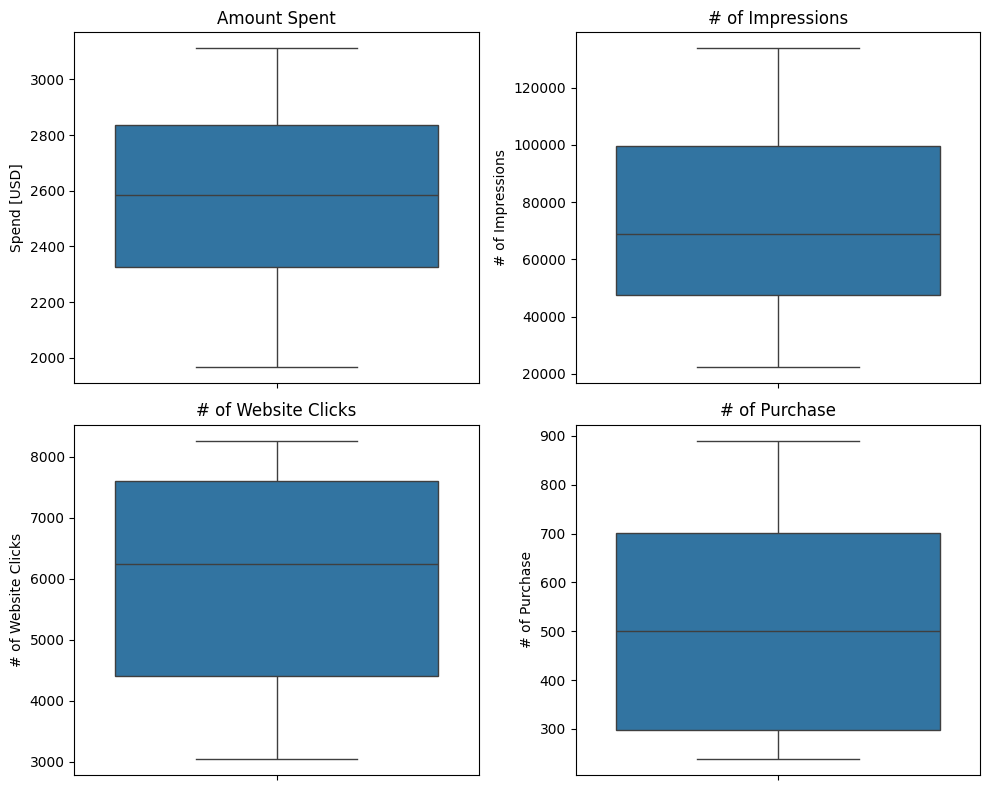

In [67]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (10,8))
ax1, ax2, ax3, ax4 = axes.flatten()
ax1 = sns.boxplot(test['Spend [USD]'], ax = ax1)
ax1.set_title('Amount Spent')
ax2 = sns.boxplot(test['# of Impressions'], ax = ax2)
ax2.set_title('# of Impressions')
ax3 = sns.boxplot(test['# of Website Clicks'], ax = ax3)
ax3.set_title('# of Website Clicks')
ax4 = sns.boxplot(test['# of Purchase'], ax = ax4)
ax4.set_title("# of Purchase")
plt.tight_layout()
plt.show()

C:\Users\thuch\anaconda3\lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
C:\Users\thuch\anaconda3\lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
C:\Users\thuch\anaconda3\lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
C:\Users\thuch\anaconda3\lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


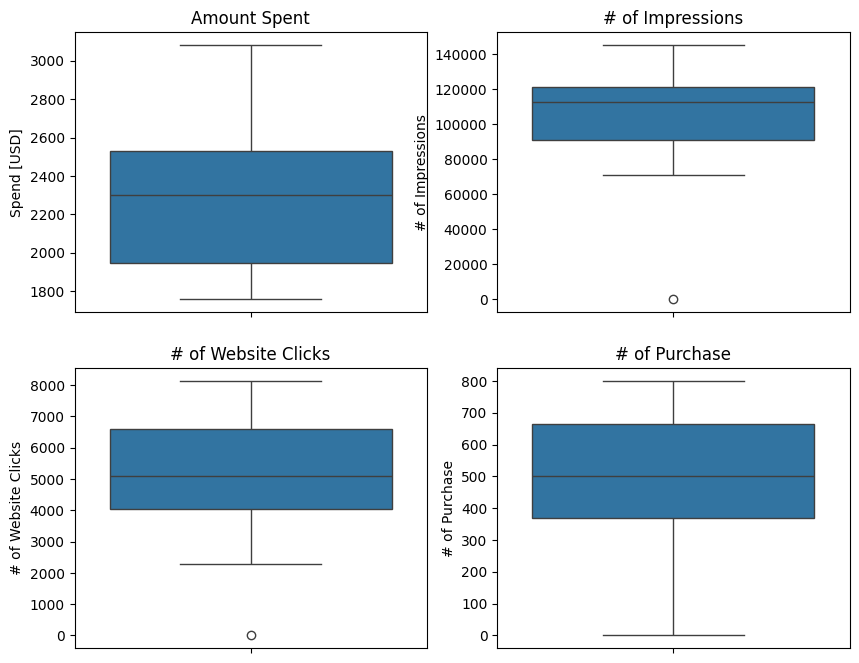

In [68]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (10,8))
ax1, ax2, ax3, ax4 = axes.flatten()
ax1 = sns.boxplot(control['Spend [USD]'], ax = ax1)
ax1.set_title('Amount Spent')
ax2 = sns.boxplot(control['# of Impressions'], ax = ax2)
ax2.set_title('# of Impressions')
ax3 = sns.boxplot(control['# of Website Clicks'], ax = ax3)
ax3.set_title('# of Website Clicks')
ax4 = sns.boxplot(control['# of Purchase'], ax = ax4)
ax4.set_title("# of Purchase")
plt.show()

In [69]:
#we need to remove outliers
control = control[control['# of Website Clicks']>0]
control = control[control['# of Impressions']>0]

We could examine some metrics:

conversion rates = #purchase/ #website clicks
cost per click = Spend/ website clicks
cost per purchase = spend/ purchase
click through rates = clicks/ #impressions

In [70]:
#create metrics
#for test
test['conversion_rate'] = test['# of Purchase']/ test['# of Website Clicks']
test['cost_per_click'] = test['Spend [USD]']/ test['# of Website Clicks']
test['cost_per_purchase'] = test['Spend [USD]']/ test['# of Purchase']
test['click_through_rate'] = test['# of Website Clicks']/ test['# of Impressions']
#for control 
control['conversion_rate'] = control['# of Purchase']/ control['# of Website Clicks']
control['cost_per_click'] = control['Spend [USD]']/ control['# of Website Clicks']
control['cost_per_purchase'] = control['Spend [USD]']/ control['# of Purchase']
control['click_through_rate'] = control['# of Website Clicks']/ control['# of Impressions']

In [71]:
fig, axes = plt.subplots(ncols= 2, nrows = 2, figsize = (9,6))
(ax1, ax2,ax3,ax4) = axes.flatten()
ax1.bar(['test', 'control'], [test['conversion_rate'].mean(), control['conversion_rate'].mean()], color= ['pink','skyblue'])
ax1.set_title('Conversion Rate between Test and Control group')
ax2.bar(['test', 'control'], [test['cost_per_click'].mean(), control['cost_per_click'].mean()], color= ['pink','skyblue'])
ax2.set_title('Cost per click between Test and Control group')
ax3.bar(['test', 'control'], [test['cost_per_purchase'].mean(), control['cost_per_purchase'].mean()], color= ['pink','skyblue'])
ax3.set_title('Cost per purchase between Test and Control group')
ax4.bar(['test', 'control'], [test['click_through_rate'].mean(), control['click_through_rate'].mean()], color= ['pink','skyblue'])
ax4.set_title('Click through rate between Test and Control group')
plt.tight_layout()

Statistical Testing

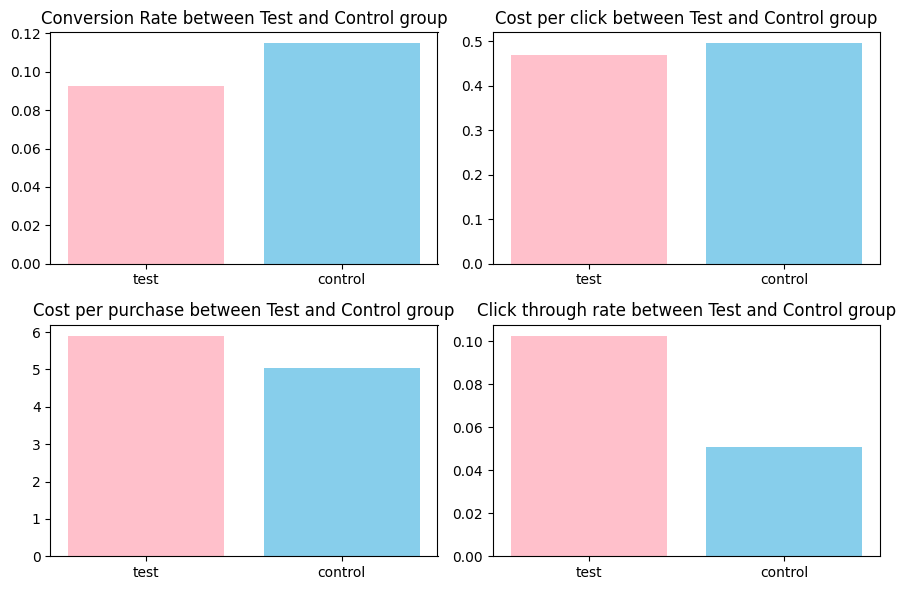

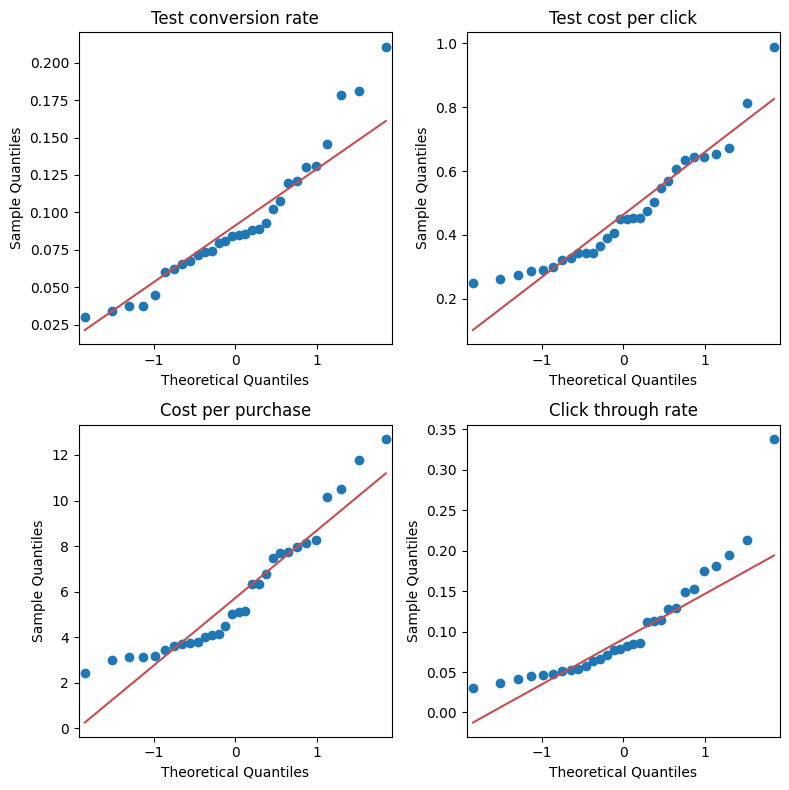

In [72]:
#testing normality
#QQ plot
import statsmodels.api as sm 
fig, axes = plt.subplots(nrows = 2, ncols =2, figsize= (8,8))
(ax1,ax2,ax3,ax4) = axes.flatten()
sm.qqplot(test['conversion_rate'].values, line ='q', ax = ax1) 
ax1.set_title("Test conversion rate")
sm.qqplot(test['cost_per_click'].values, line ='q', ax = ax2) 
ax2.set_title('Test cost per click')
sm.qqplot(test['cost_per_purchase'].values, line ='q', ax = ax3) 
ax3.set_title('Cost per purchase')
sm.qqplot(test['click_through_rate'].values, line ='q', ax = ax4) 
ax4.set_title('Click through rate')
plt.tight_layout()
plt.show()

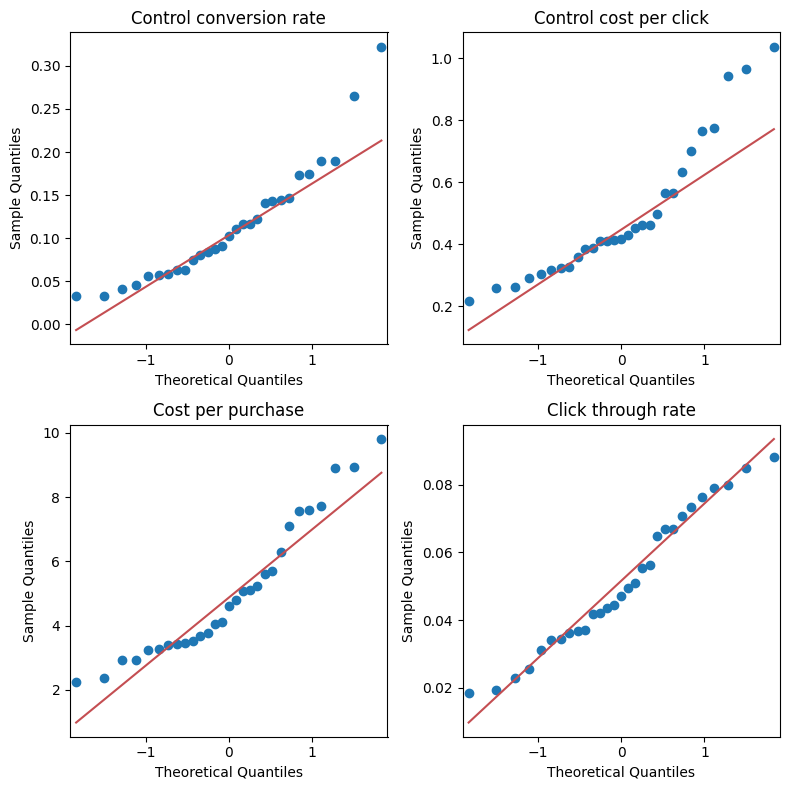

In [73]:
#QQ plot for control
fig, axes = plt.subplots(nrows = 2, ncols =2, figsize= (8,8))
(ax1,ax2,ax3,ax4) = axes.flatten()
sm.qqplot(control['conversion_rate'].values, line ='q', ax = ax1) 
ax1.set_title("Control conversion rate")
sm.qqplot(control['cost_per_click'].values, line ='q', ax = ax2) 
ax2.set_title('Control cost per click')
sm.qqplot(control['cost_per_purchase'].values, line ='q', ax = ax3) 
ax3.set_title('Cost per purchase')
sm.qqplot(control['click_through_rate'].values, line ='q', ax = ax4) 
ax4.set_title('Click through rate')
plt.tight_layout()
plt.show()

In [74]:
#Shapiro
from scipy.stats import shapiro
metrics = ['conversion_rate','cost_per_click','cost_per_purchase','click_through_rate']
print('Test group: ')
for i in metrics:
    print(f'Shapiro Result for: {i}')
    print(shapiro(test[i]))
print('Control group: ')
for i in metrics:
    print(f'Shapiro Result for: {i}')
    print(shapiro(control[i]))

Test group: 
Shapiro Result for: conversion_rate
ShapiroResult(statistic=0.9254688343258307, pvalue=0.03726829960369907)
Shapiro Result for: cost_per_click
ShapiroResult(statistic=0.9114477349152383, pvalue=0.016188345254485623)
Shapiro Result for: cost_per_purchase
ShapiroResult(statistic=0.8965798196078477, pvalue=0.006934224858783165)
Shapiro Result for: click_through_rate
ShapiroResult(statistic=0.8409182166025053, pvalue=0.000402531289346151)
Control group: 
Shapiro Result for: conversion_rate
ShapiroResult(statistic=0.8946046791264097, pvalue=0.007293667050522266)
Shapiro Result for: cost_per_click
ShapiroResult(statistic=0.8766601198392119, pvalue=0.0028297940482207816)
Shapiro Result for: cost_per_purchase
ShapiroResult(statistic=0.9131872183920033, pvalue=0.02056352984195968)
Shapiro Result for: click_through_rate
ShapiroResult(statistic=0.9549021042482709, pvalue=0.24480975923502396)


All values are not following normal distribution besides Control group's click through rate (p-value = 0.25 > 0.05). However since the click through rate for test group does not follow normal distribution, we will also apply a/b testing method for non-normal values for the click through rate.
Hence, we will use the Mann Whitney U test in this case

In [75]:
from scipy.stats import mannwhitneyu

In [76]:
for i in metrics:
    print(f'A/B testing result for {i}')
    print(mannwhitneyu(test[i], control[i]))

A/B testing result for conversion_rate
MannwhitneyuResult(statistic=367.0, pvalue=0.30610346625699913)
A/B testing result for cost_per_click
MannwhitneyuResult(statistic=420.0, pvalue=0.8259891984722325)
A/B testing result for cost_per_purchase
MannwhitneyuResult(statistic=508.0, pvalue=0.27166245232517694)
A/B testing result for click_through_rate
MannwhitneyuResult(statistic=677.0, pvalue=0.00025063172993413605)


Based on the result of Mann Whitney U test:
- Only Click through rate metric is difference between the 2 group, with p-value < 0.05
- In the test group: the click through rate is statistically significantly higher than the control group
- There is no statistical difference between the 2 groups for the remaining metrics